In [1]:
import sys
import pandas as pd
import mglearn
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import IPython 
import sklearn
from sklearn.model_selection import train_test_split

import warnings
#warnings.filterwarnings("ignore")

# 2.3.9 Neural Networks (Deep learning)
- We just handle multilayer perceptrons (MLP)

## Neural network model
- MLP is the normalized linear model which came from several steps
- the left node refers input features and the arrow lines are coefficients and the right nodes are output feature.

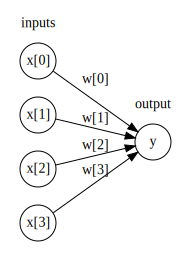

In [2]:
display(mglearn.plots.plot_logistic_regression_graph())

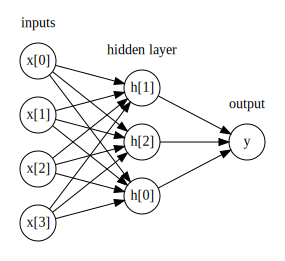

In [3]:
display(mglearn.plots.plot_single_hidden_layer_graph())

Text(0, 0.5, 'relu(x), tanh(x)')

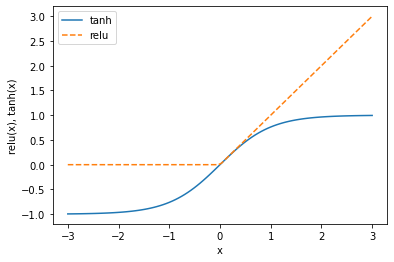

In [4]:
line = np.linspace(-3, 3, 100)
plt.plot(line, np.tanh(line), label="tanh")
plt.plot(line, np.maximum(line, 0), linestyle='--', label="relu")
plt.legend(loc="best")
plt.xlabel("x")
plt.ylabel("relu(x), tanh(x)")

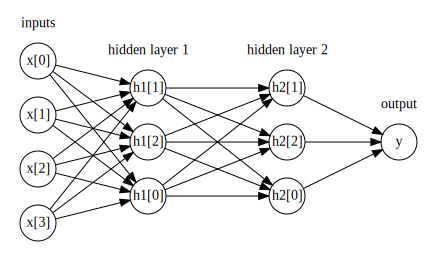

In [5]:
mglearn.plots.plot_two_hidden_layer_graph()

## neural network tunning

Text(0, 0.5, 'feature 1')

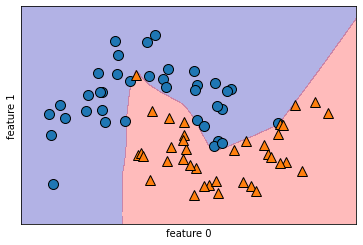

In [6]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

mlp = MLPClassifier(solver='lbfgs', random_state=0).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("feature 0")
plt.ylabel("feature 1")

Text(0, 0.5, 'feature 1')

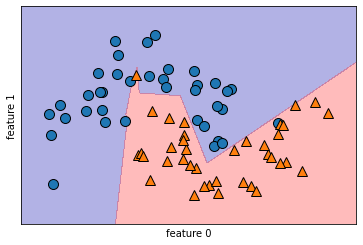

In [7]:
# we can lessen the number of hidden units
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("feature 0")
plt.ylabel("feature 1")

Text(0, 0.5, 'feature 1')

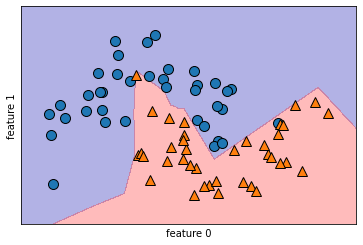

In [8]:
# 10 hidden units by 2 hidden layers
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10,10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("feature 0")
plt.ylabel("feature 1")

/home/hyunjong/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Text(0, 0.5, 'feature 1')

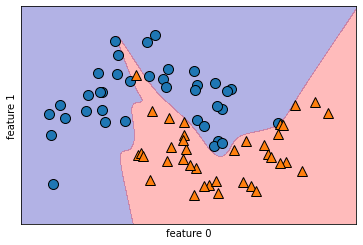

In [9]:
# 10 hidden units by 2 hidden layers applied with tanh activation function
mlp = MLPClassifier(solver='lbfgs', random_state=0, 
                    activation='tanh',hidden_layer_sizes=[10,10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("feature 0")
plt.ylabel("feature 1")

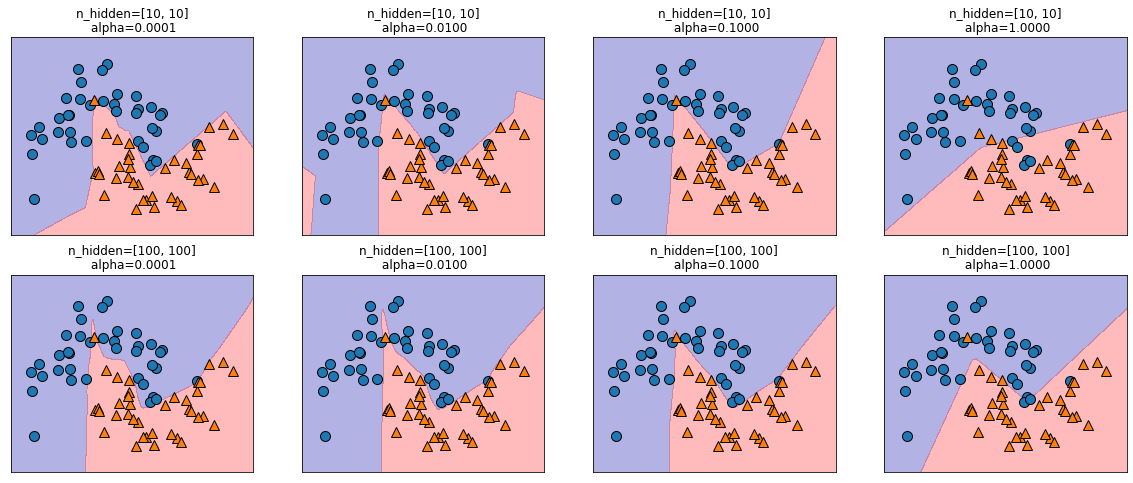

In [12]:
# amending alpha value
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for axx, n_hidden_nodes in zip(axes, [10, 100]):
    for ax, alpha in zip(axx, [0.0001, 0.01, 0.1, 1]):
        mlp = MLPClassifier(solver='lbfgs', random_state=0,
                           hidden_layer_sizes=[n_hidden_nodes, n_hidden_nodes],
                           alpha=alpha)
        mlp.fit(X_train, y_train)
        mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=0.3, ax=ax)
        mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)
        ax.set_title("n_hidden=[{}, {}]\n alpha={:.4f}".format(
                      n_hidden_nodes, n_hidden_nodes, alpha))

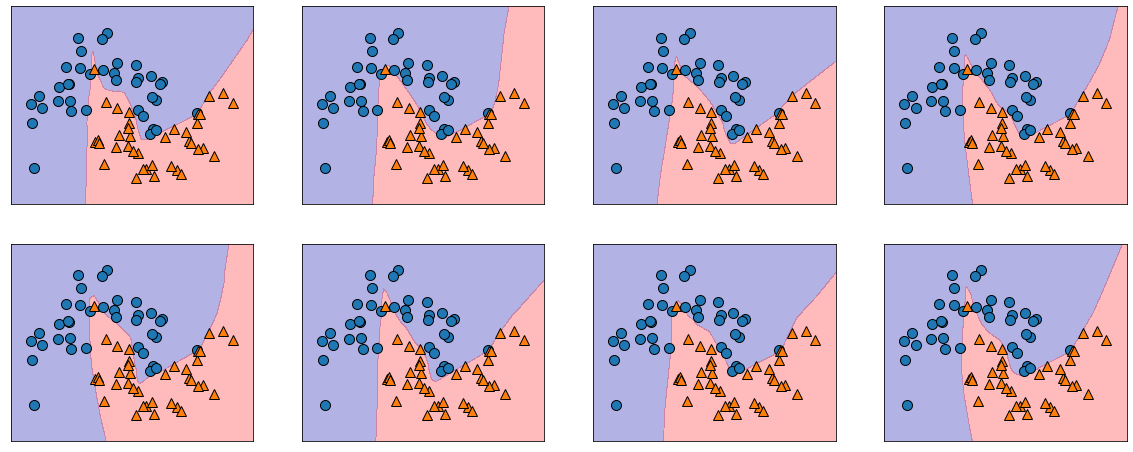

In [13]:
#differenciate the resets
fig, axes = plt.subplots(2, 4, figsize=(20,8))
for i, ax in enumerate(axes.ravel()):
    mlp = MLPClassifier(solver='lbfgs', random_state=i,
                       hidden_layer_sizes=[100, 100])
    mlp.fit(X_train, y_train)
    mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)

In [14]:
# using breast cancer data
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

print("Maximum for each feature on breast cancer data: \n", cancer.data.max(axis=0))

Maximum for each feature on breast cancer data: 
 [2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 3.454e-01 4.268e-01
 2.012e-01 3.040e-01 9.744e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 7.895e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 1.058e+00 1.252e+00 2.910e-01
 6.638e-01 2.075e-01]


In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)

print("training set accuaracy: {:.3f}".format(mlp.score(X_train, y_train)))
print("test set accuaracy: {:.3f}".format(mlp.score(X_test, y_test)))

training set accuaracy: 0.939
test set accuaracy: 0.916


### scaling

In [17]:
# calculate average of each feature on training set
mean_on_train = X_train.mean(axis=0)
# calculate standard error of each feature on training set
std_on_train = X_train.std(axis=0)

X_train_scaled = (X_train - mean_on_train) / std_on_train

X_test_scaled = (X_test - mean_on_train) / std_on_train

mlp = MLPClassifier(random_state=0)
mlp.fit(X_train_scaled, y_train)

print("training set accuaracy: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("test set accuaracy: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

training set accuaracy: 0.991
test set accuaracy: 0.965


In [18]:
# increase max_iter
mlp = MLPClassifier(max_iter=1000, random_state=0)
mlp.fit(X_train_scaled, y_train)

print("training set accuaracy: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("test set accuaracy: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

training set accuaracy: 1.000
test set accuaracy: 0.972


In [19]:
# increase alpha from 0.0001 to 1
mlp = MLPClassifier(max_iter=1000, alpha=1, random_state=0)
mlp.fit(X_train_scaled, y_train)

print("training set accuaracy: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("test set accuaracy: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

training set accuaracy: 0.988
test set accuaracy: 0.972


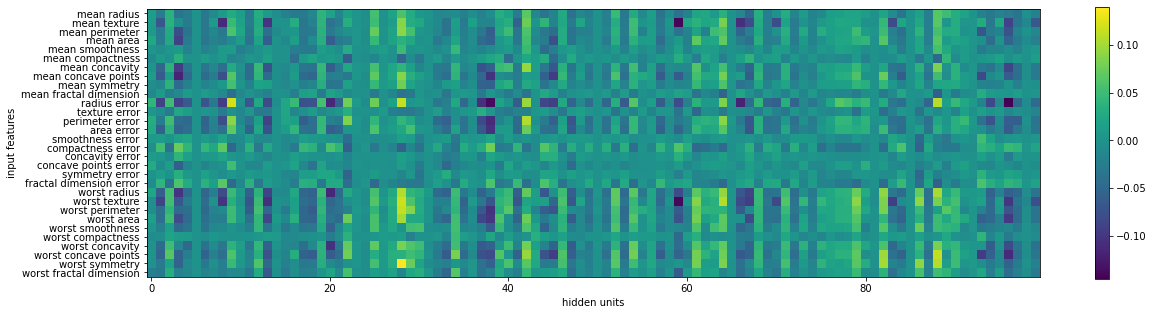

In [21]:
# heat-map, trained weight between input and hidden layers
plt.figure(figsize=(20,5))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis')
plt.yticks(range(30), cancer.feature_names)
plt.xlabel("hidden units")
plt.ylabel("input features")
plt.colorbar()